#In this exercise, you'll predict house prices using your model.

**1.** Load the housing prices data from Thinkful's database.

**2.** Split your data into train and test sets.

**3.** Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

**4.** Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
Is the performance of your model satisfactory? Why?

**5.** Try to improve your model in terms of predictive performance by adding or removing some variables.

## **1. Load the housing prices data from Thinkful's database.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

house_prices_df.head()


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


## **2. Split your data into train and test sets.**

In [3]:
# Y is the target variable
Y = house_prices_df['saleprice']

# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'yearremodadd', 'yearbuilt']]
#X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'yearremodadd', 'yearbuilt', 'fullbath', 'firstflrsf']]


In [4]:
# add a constant to the model
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


The number of observations in training set is 1168
The number of observations in test set is 292


## **3. Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.**

In [5]:
# add a constant to the model, the “baseline” of the data in case all of your features values are 0.

X_train = sm.add_constant(X_train)

# Let's train the model

results = sm.OLS(y_train, X_train).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     638.5
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:53:42   Log-Likelihood:                -13974.
No. Observations:                1168   AIC:                         2.796e+04
Df Residuals:                    1161   BIC:                         2.800e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.884e+05   1.37e+05     -7.214      0.000   -1.26e+06    -7.2e+05
overallqual    2.02e+04   1353.263     14.926      0.000    1.75e+04    2.29e+04
grlivarea       48.0328      2.877     16.695      0.000      42.388      53.678
garagecars    1.592e+04   2045.774      7.783      0.000    1.19e+04    1.99e+04
totalbsmtsf     26.5240      3.061      8.665      0.000      20.518      32.530
yearremodadd   255.2548     71.201      3.585      0.000     115.559     394.951
yearbuilt      208.0900     53.838      3.865      0.000     102.459     313.721
==============================================================================
Omnibus:                      391.321   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35254.008
Skew:                          -0.555   Prob(JB):                         0.00
Kurtosis:                      29.892   Cond. No.                     4.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **4. Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.**

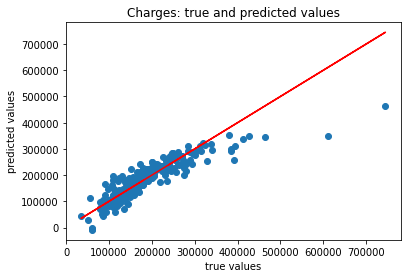

Mean absolute error of the prediction is: '24923.939684553097'
Mean squared error of the prediction is: '1474012588.6522439'
Root mean squared error of the prediction is: '38392.87158643182'
Mean absolute percentage error of the prediction is: '15.017988590621522'


In [6]:
# add constant to the model
X_test = sm.add_constant(X_test)

# making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


print("Mean absolute error of the prediction is: '{}'".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: '{}'".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: '{}'".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: '{}'".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



These numbers are all so big, but this model is dealing with relatively large values in the first place. The MAPE is only 15%, which doesn't seem bad.

This model seems to do a decent job of prediction, except for a few large outliers.The model seems to make close predictions for true values that are under almost \$350,000. Saying that that the MAE, or average error per prediction is off by $24,923


## **5. Is the performance of your model satisfactory? Why? Try to improve your model in terms of predictive performance by adding or removing some variables.**

**Lets add some other features and see**

In [7]:
corr = house_prices_df.corr()
corr[corr['saleprice']>0.5].index

Index(['overallqual', 'yearbuilt', 'yearremodadd', 'totalbsmtsf', 'firstflrsf',
       'grlivarea', 'fullbath', 'totrmsabvgrd', 'garagecars', 'garagearea',
       'saleprice'],
      dtype='object')

Add firstflrsf, fullbath and totrmsabvgrd features in our model and see what happend


In [8]:
# Y is the target variable
Y = house_prices_df['saleprice']

# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'yearremodadd', 'yearbuilt', 'firstflrsf', 'fullbath', 'totrmsabvgrd']]

# add a constant to the model
X = sm.add_constant(X)
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [9]:
# add a constant to the model, the “baseline” of the data in case all of your features values are 0.

X_train = sm.add_constant(X_train)

# Let's train the model

results = sm.OLS(y_train, X_train).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     638.5
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:53:42   Log-Likelihood:                -13974.
No. Observations:                1168   AIC:                         2.796e+04
Df Residuals:                    1161   BIC:                         2.800e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.884e+05   1.37e+05     -7.214      0.000   -1.26e+06    -7.2e+05
overallqual    2.02e+04   1353.263     14.926      0.000    1.75e+04    2.29e+04
grlivarea       48.0328      2.877     16.695      0.000      42.388      53.678
garagecars    1.592e+04   2045.774      7.783      0.000    1.19e+04    1.99e+04
totalbsmtsf     26.5240      3.061      8.665      0.000      20.518      32.530
yearremodadd   255.2548     71.201      3.585      0.000     115.559     394.951
yearbuilt      208.0900     53.838      3.865      0.000     102.459     313.721
==============================================================================
Omnibus:                      391.321   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35254.008
Skew:                          -0.555   Prob(JB):                         0.00
Kurtosis:                      29.892   Cond. No.                     4.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

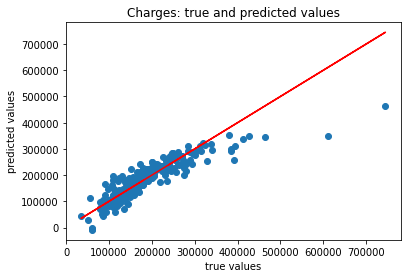

Mean absolute error of the prediction is: '24923.939684553097'
Mean squared error of the prediction is: '1474012588.6522439'
Root mean squared error of the prediction is: '38392.87158643182'
Mean absolute percentage error of the prediction is: '15.017988590621522'


In [10]:
# add constant to the model
X_test = sm.add_constant(X_test)

# making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


print("Mean absolute error of the prediction is: '{}'".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: '{}'".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: '{}'".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: '{}'".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



We are getting the same results. Now let's check and remove the outlier

In [11]:
house_prices_df['saleprice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

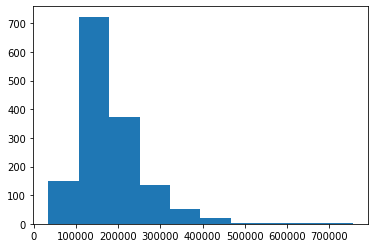

In [12]:
plt.hist(house_prices_df['saleprice'])

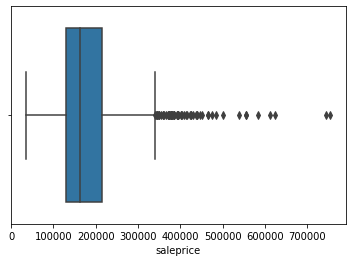

In [13]:
sns.boxplot(house_prices_df['saleprice'])

As we can see there is a lot of outliers. I think I am going to have to call the high-priced homes outliers, remove them, and rerun.

In [15]:
house_prices_df1 = house_prices_df.loc[house_prices_df['saleprice'] < 350000]

In [16]:
# Y is the target variable
Y = house_prices_df1['saleprice']

# X is the feature set
X = house_prices_df1[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'yearremodadd', 'yearbuilt']]
#X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'yearremodadd', 'yearbuilt', 'fullbath', 'firstflrsf']]

# add a constant to the model
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1123
The number of observations in test set is 281


In [17]:
# add a constant to the model, the “baseline” of the data in case all of your features values are 0.

X_train = sm.add_constant(X_train)

# Let's train the model

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     632.2
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:53:43   Log-Likelihood:                -13112.
No. Observations:                1123   AIC:                         2.624e+04
Df Residuals:                    1116   BIC:                         2.627e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.157e+06   1.03e+05    -11.223      0.000   -1.36e+06   -9.54e+05
overallqual   1.618e+04   1018.238     15.886      0.000    1.42e+04    1.82e+04
grlivarea       36.3774      2.259     16.106      0.000      31.946      40.809
garagecars    1.384e+04   1512.212      9.155      0.000    1.09e+04    1.68e+04
totalbsmtsf     17.5254      2.466      7.107      0.000      12.687      22.364
yearremodadd   316.5483     52.585      6.020      0.000     213.372     419.724
yearbuilt      257.2559     40.398      6.368      0.000     177.991     336.521
==============================================================================
Omnibus:                      583.428   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22861.124
Skew:                          -1.716   Prob(JB):                         0.00
Kurtosis:                      24.836   Cond. No.                     4.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

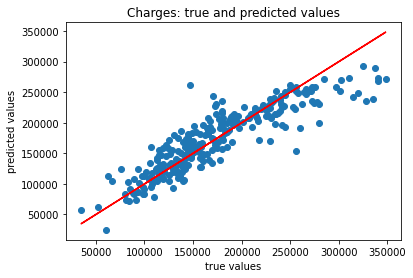

Mean absolute error of the prediction is: '20096.918470465742'
Mean squared error of the prediction is: '775513252.3694929'
Root mean squared error of the prediction is: '27848.038573111266'
Mean absolute percentage error of the prediction is: '12.489039797654826'


In [18]:
# add constant to the model
X_test = sm.add_constant(X_test)

# making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color = 'red')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


print("Mean absolute error of the prediction is: '{}'".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: '{}'".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: '{}'".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: '{}'".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Looks pretty good!

**So far this may be the best.**